In [59]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 91% 135M/149M [00:01<00:00, 124MB/s]
100% 149M/149M [00:01<00:00, 135MB/s]


In [61]:
def get_class_paths(path):
    classes = []
    class_paths = []

    # Iterate through dictionaries in the training path
    for label in os.listdir(path):
        label_path = os.path.join(path, label)

        # Check if it's a directory
        if os.path.isdir(label_path):
            # Iterate through images in the label directory
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path, image)

                # Add class and path to respective lists
                classes.append(label)
                class_paths.append(image_path)

    # Create a DataFrame with the collected data
    df = pd.DataFrame({
        'Class Path': class_paths,
        'Class': classes
    })

    return df

In [62]:
tr_df = get_class_paths("/content/Training")

In [63]:
tr_df

,Class Path,Class
0,/content/Training/meningioma/Tr-me_0807.jpg,meningioma
1,/content/Training/meningioma/Tr-me_0667.jpg,meningioma
2,/content/Training/meningioma/Tr-me_0455.jpg,meningioma
3,/content/Training/meningioma/Tr-me_0741.jpg,meningioma
4,/content/Training/meningioma/Tr-me_0492.jpg,meningioma
...,...,...
5707,/content/Training/pituitary/Tr-pi_0198.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_0184.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_0611.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_1148.jpg,pituitary


In [64]:
ts_df = get_class_paths("/content/Testing")

In [65]:
ts_df

,Class Path,Class
0,/content/Testing/meningioma/Te-me_0288.jpg,meningioma
1,/content/Testing/meningioma/Te-me_0100.jpg,meningioma
2,/content/Testing/meningioma/Te-me_0130.jpg,meningioma
3,/content/Testing/meningioma/Te-me_0126.jpg,meningioma
4,/content/Testing/meningioma/Te-me_0109.jpg,meningioma
...,...,...
1306,/content/Testing/pituitary/Te-pi_0124.jpg,pituitary
1307,/content/Testing/pituitary/Te-pi_0051.jpg,pituitary
1308,/content/Testing/pituitary/Te-pi_0076.jpg,pituitary
1309,/content/Testing/pituitary/Te-piTr_0001.jpg,pituitary


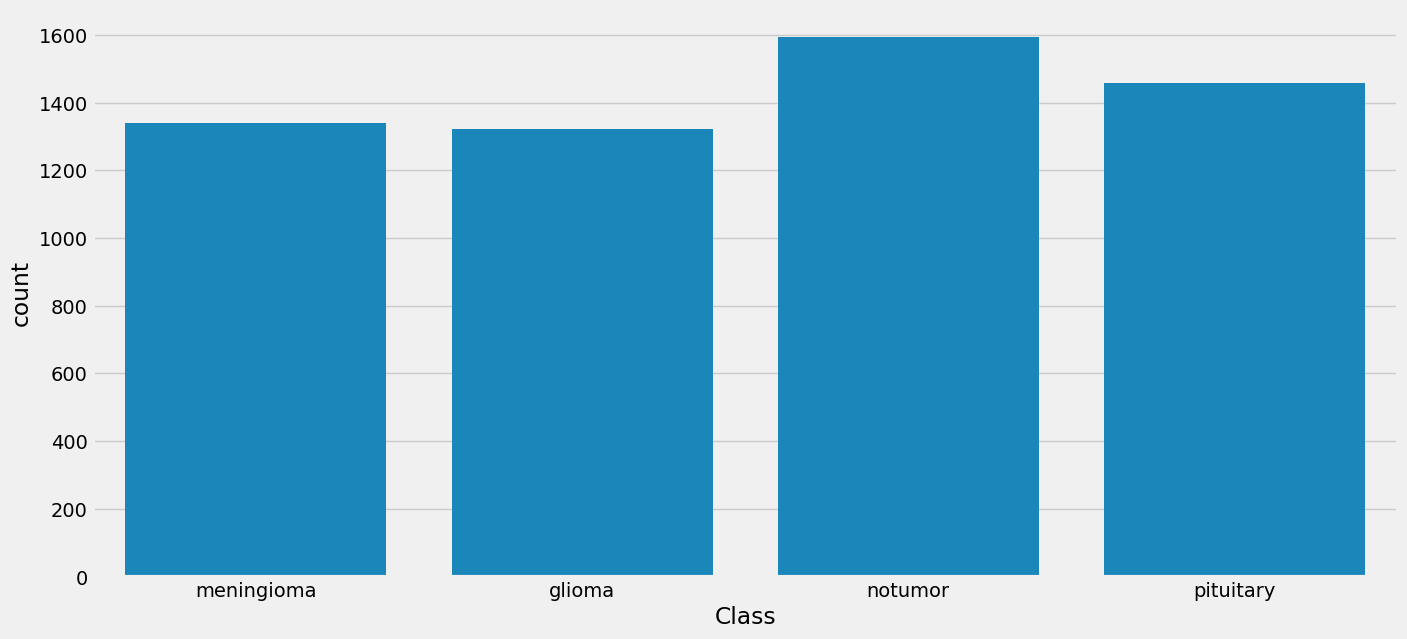

In [66]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

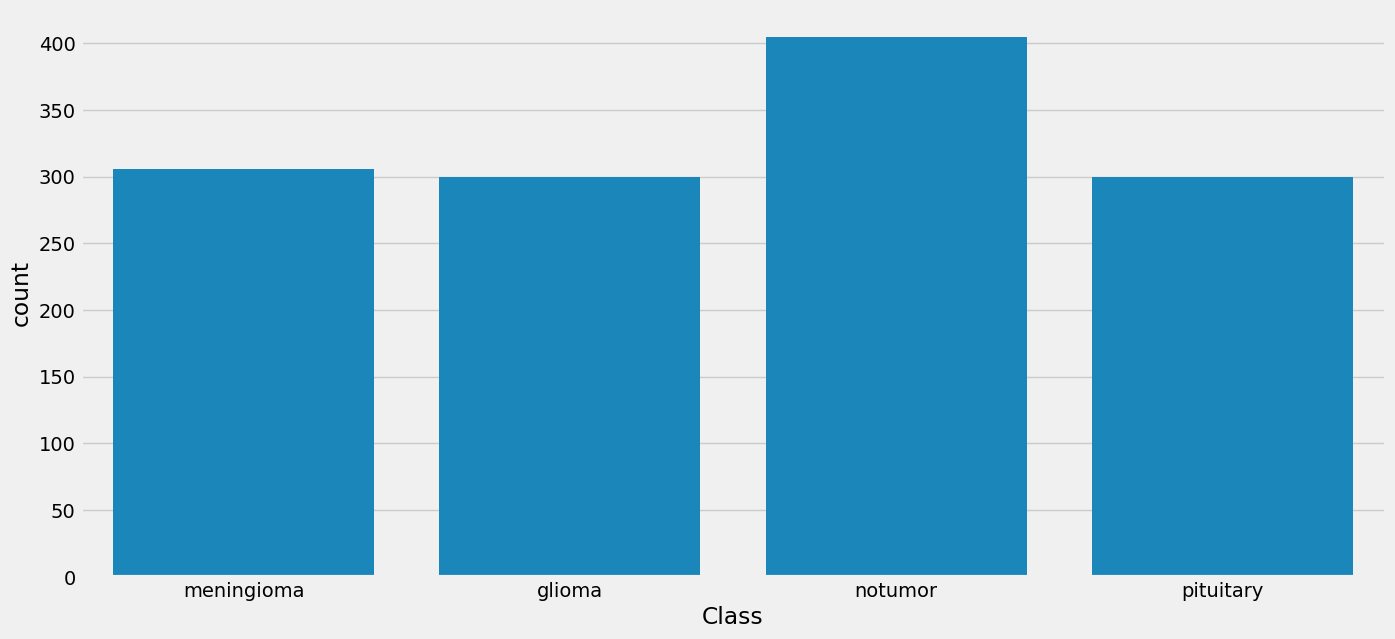

In [67]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [69]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [70]:
valid_df

,Class Path,Class
289,/content/Testing/meningioma/Te-me_0297.jpg,meningioma
763,/content/Testing/notumor/Te-no_0199.jpg,notumor
358,/content/Testing/glioma/Te-gl_0258.jpg,glioma
1036,/content/Testing/pituitary/Te-pi_0195.jpg,pituitary
1051,/content/Testing/pituitary/Te-pi_0270.jpg,pituitary
...,...,...
281,/content/Testing/meningioma/Te-me_0241.jpg,meningioma
334,/content/Testing/glioma/Te-gl_0038.jpg,glioma
305,/content/Testing/meningioma/Te-me_0188.jpg,meningioma
1307,/content/Testing/pituitary/Te-pi_0051.jpg,pituitary


In [71]:
ts_df

,Class Path,Class
1177,/content/Testing/pituitary/Te-pi_0055.jpg,pituitary
552,/content/Testing/glioma/Te-gl_0142.jpg,glioma
147,/content/Testing/meningioma/Te-me_0170.jpg,meningioma
205,/content/Testing/meningioma/Te-me_0247.jpg,meningioma
713,/content/Testing/notumor/Te-no_0321.jpg,notumor
...,...,...
1055,/content/Testing/pituitary/Te-pi_0064.jpg,pituitary
282,/content/Testing/meningioma/Te-me_0284.jpg,meningioma
330,/content/Testing/glioma/Te-gl_0242.jpg,glioma
1119,/content/Testing/pituitary/Te-pi_0238.jpg,pituitary


In [72]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [73]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size = batch_size,
                                             target_size = img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size = batch_size,
                                             target_size = img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size = 16,
                                             target_size = img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


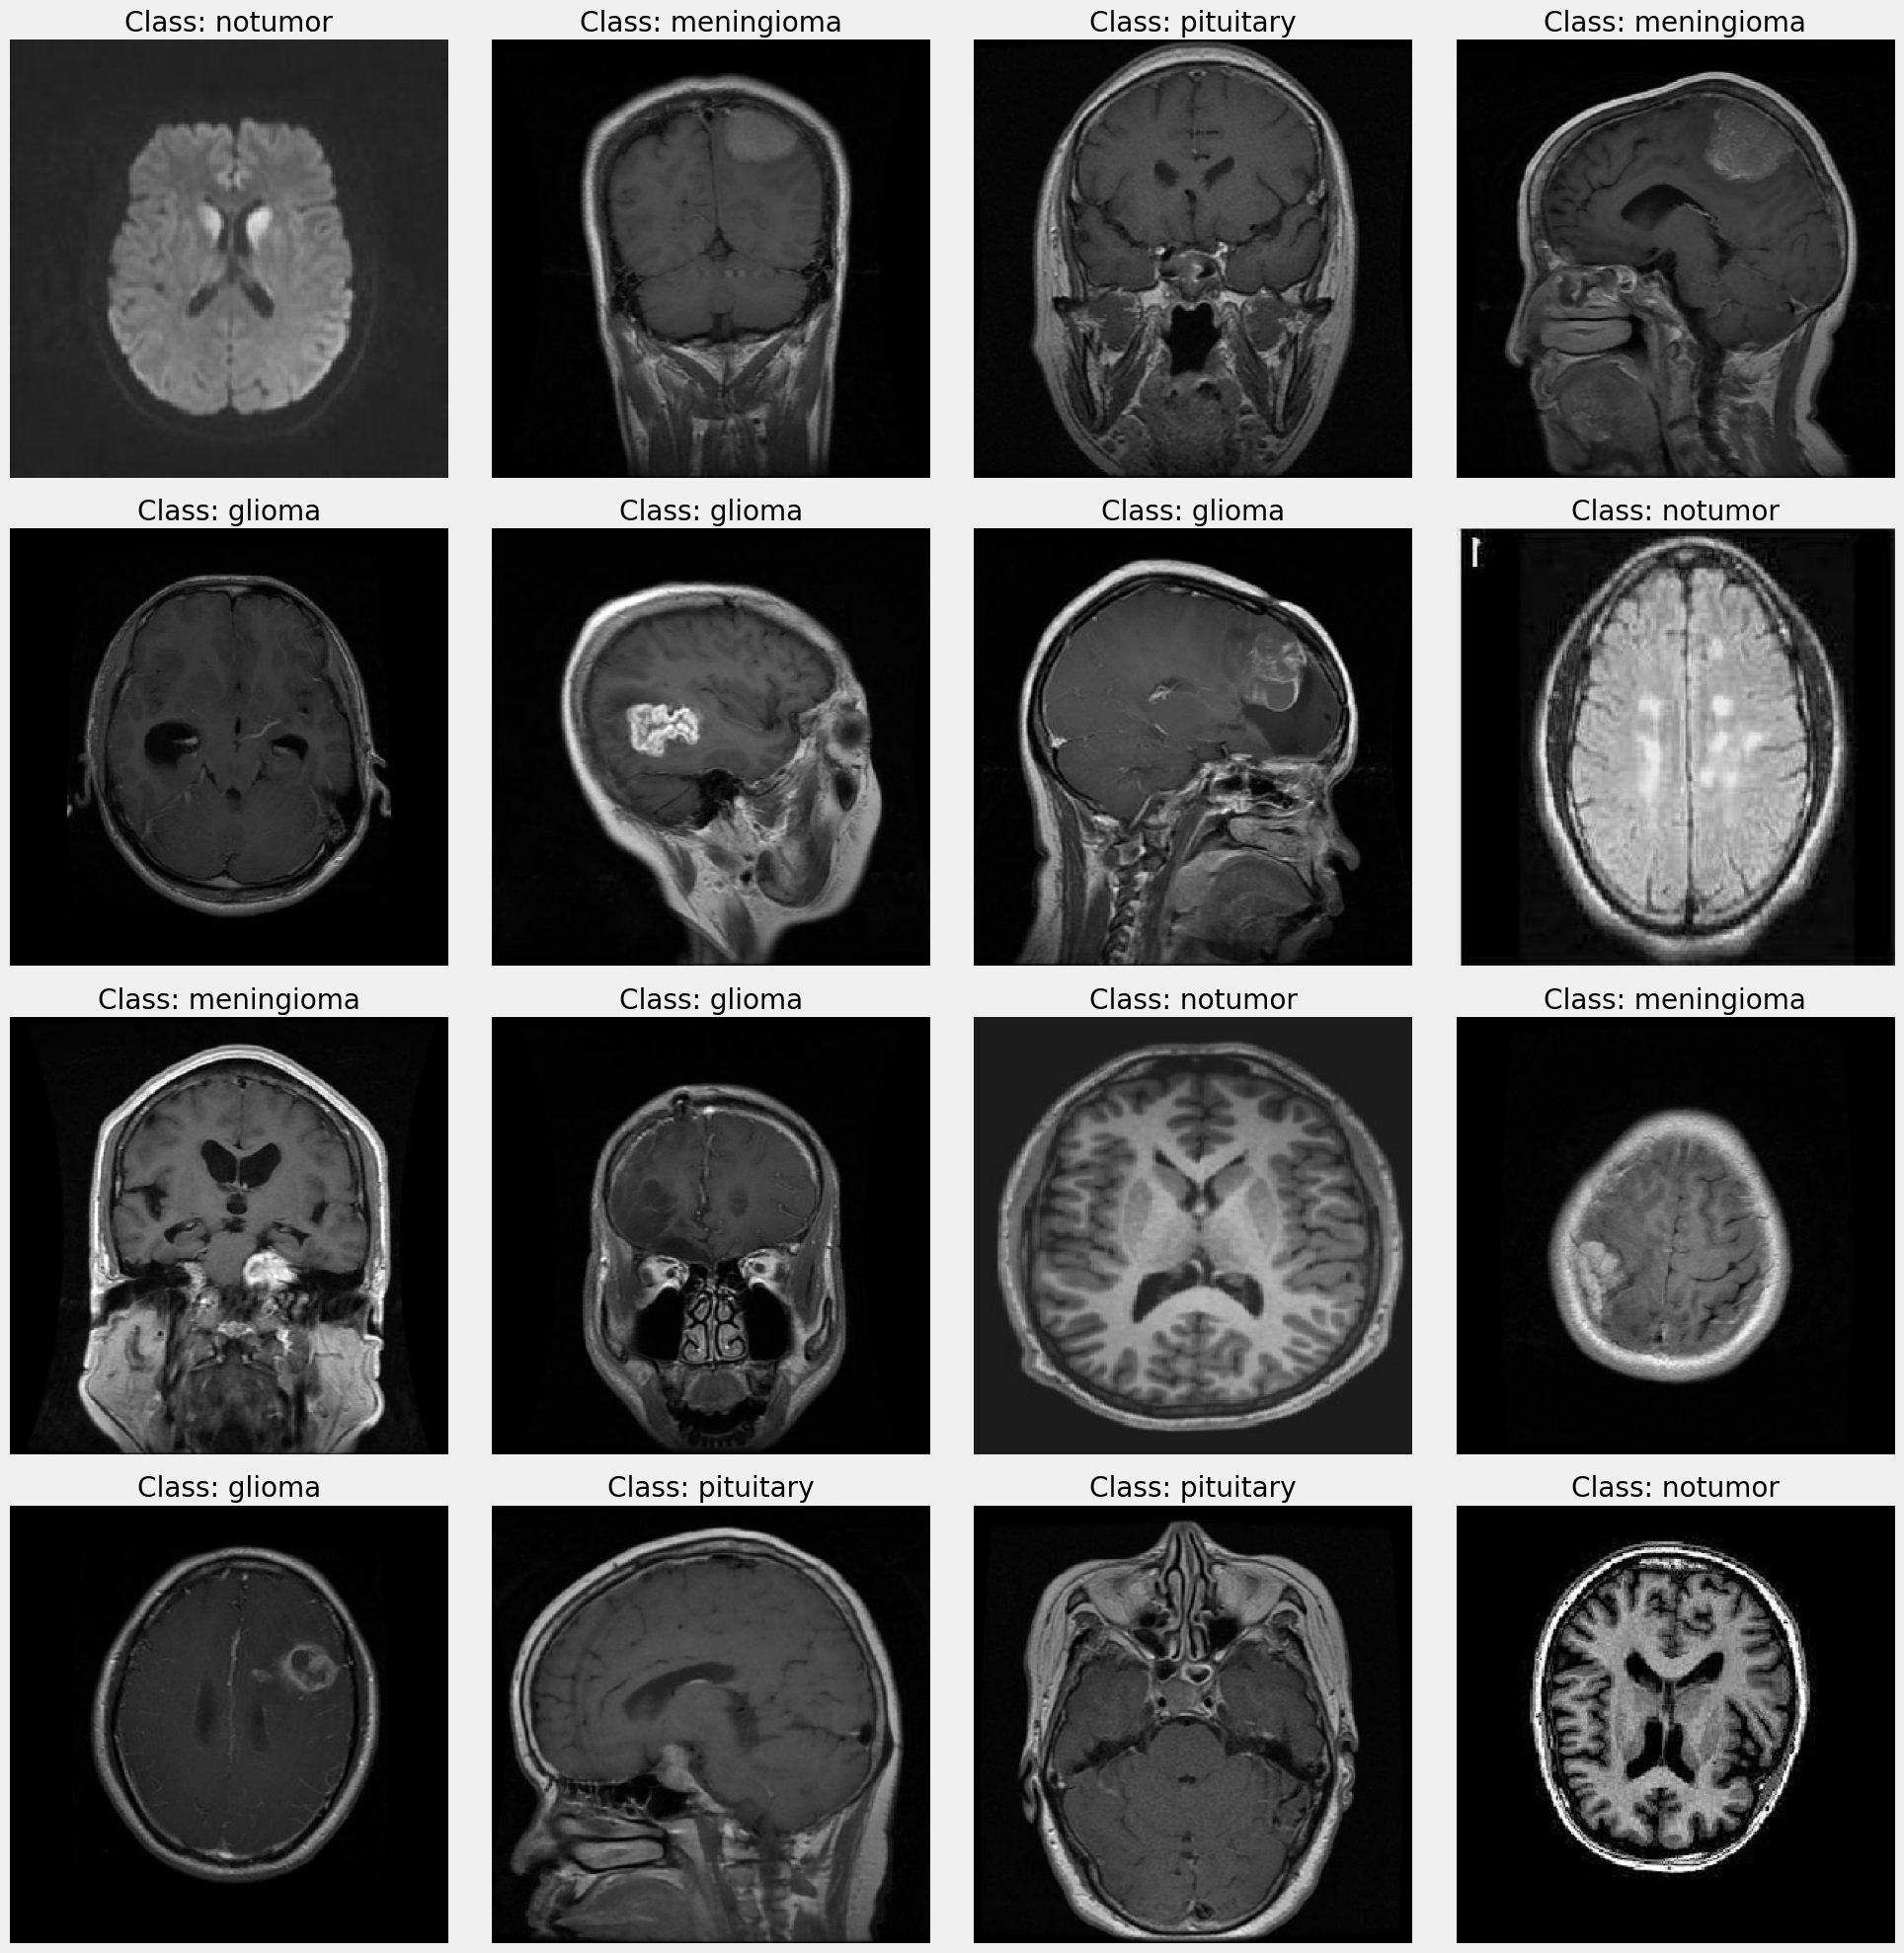

In [74]:
plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(4, 4, i+1)
    batch = next(tr_gen)
    image = batch[0][0]
    label = batch [1][0]
    plt.imshow(image)

    # Get the class index
    class_index = np.argmax(label)

    # Get the list of class names and class indices
    class_names = list(tr_gen.class_indices.keys())
    class_indices = list(tr_gen.class_indices.values())

    # Find the index of the class_index in the list of indices
    index_position = class_indices.index(class_index)

    # Get the class name using the index position
    class_name = class_names[index_position]

    plt.title(f"Class: {class_name}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [75]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top= False,
                                           weights = "imagenet",
                                           input_shape = img_shape,
                                           pooling = 'max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation = 'relu'),
    Dropout(rate = 0.25),
    Dense(4, activation = 'softmax')
])

In [76]:
model.compile(Adamax(learning_rate= 0.001),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy',
               Precision (),
               Recall()])

In [77]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 203s 913ms/step - accuracy: 0.7560 - loss: 0.7605 - precision_3: 0.8184 - recall_3: 0.6486 - val_accuracy: 0.9282 - val_loss: 0.2655 - val_precision_3: 0.9293 - val_recall_3: 0.9237
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 145s 812ms/step - accuracy: 0.9740 - loss: 0.0806 - precision_3: 0.9754 - recall_3: 0.9735 - val_accuracy: 0.9878 - val_loss: 0.0343 - val_precision_3: 0.9878 - val_recall_3: 0.9863
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 145s 811ms/step - accuracy: 0.9924 - loss: 0.0241 - precision_3: 0.9935 - recall_3: 0.9920 - val_accuracy: 0.9756 - val_loss: 0.0896 - val_precision_3: 0.9756 - val_recall_3: 0.9756
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 145s 812ms/step - accuracy: 0.9914 - loss: 0.0319 - precision_3: 0.9914 - recall_3: 0.9912 - val_accuracy: 0.9847 - val_loss: 0.0504 - val_precision_3: 0.9847 - val_recall_3: 0.9847
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 202s 813ms/step - accuracy: 0.9936 - loss: 0.0179 - precision_3: 0.9936 - rec

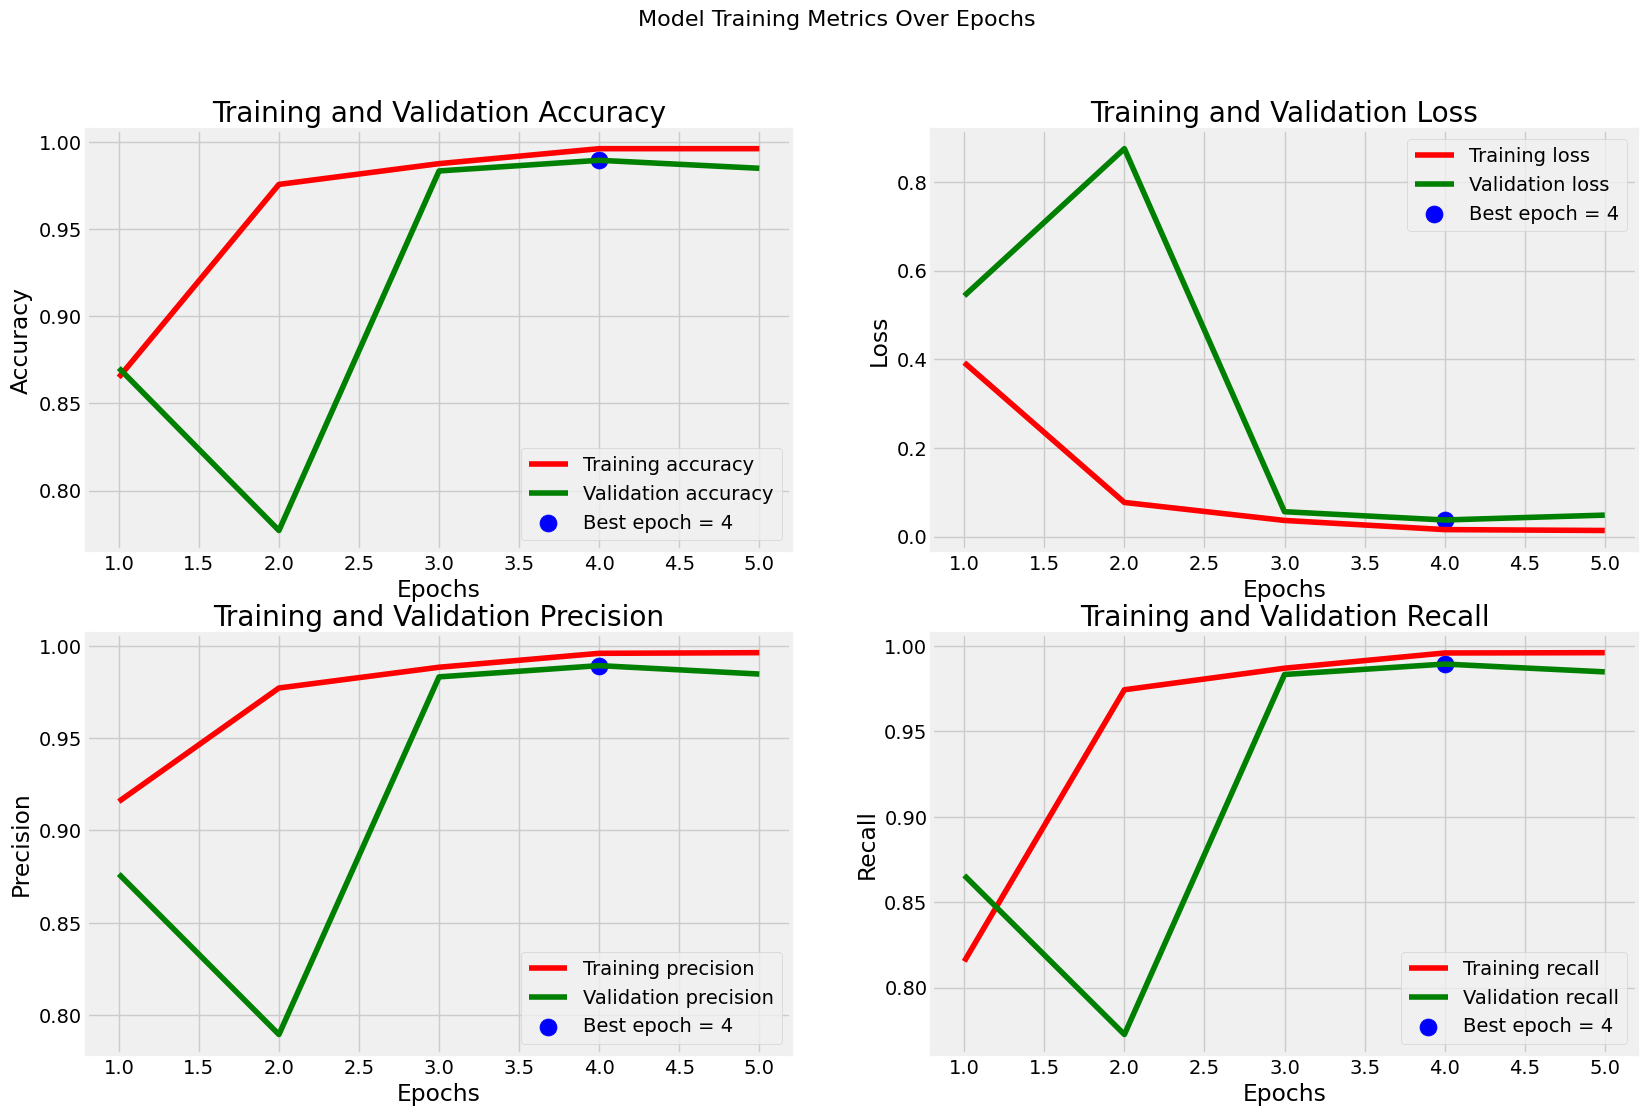

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)
    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')
    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)
plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {train_score[0]:.4f}")


179/179 ━━━━━━━━━━━━━━━━━━━━ 45s 251ms/step - accuracy: 0.9982 - loss: 0.0031 - precision: 0.9982 - recall: 0.9982
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 245ms/step - accuracy: 0.9857 - loss: 0.0410 - precision: 0.9857 - recall: 0.9857


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.9862 - loss: 0.0524 - precision: 0.9862 - recall: 0.9862
Train Accuracy: 99.86%
Train Loss: 0.0031


Validation Accuracy: 98.47%
Validation Loss: 0.0464


Test Accuracy: 98.63%
Test Loss: 0.0031


41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step


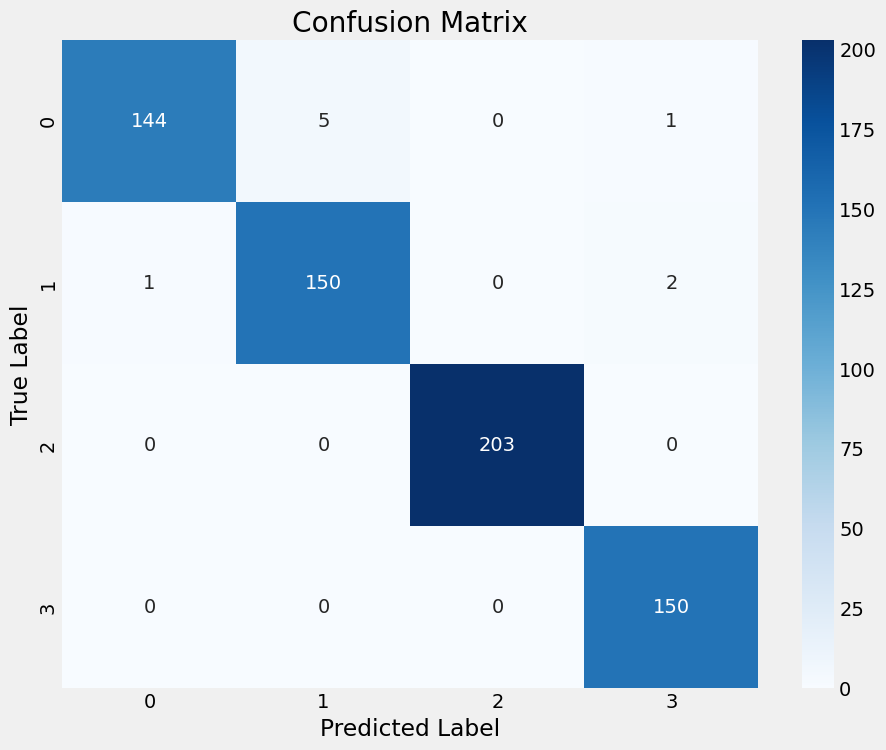

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from PIL import Image

def predict(img_path: str) -> None:
    # Get class labels
    labels = list(class_dict.keys())

    # Create figure
    plt.figure(figsize=(6, 8))

    # Load and preprocess image
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Get model predictions
    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    # Get predicted class
    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    # Plot original image
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

    # Plot prediction probabilities
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel("Probability", fontsize=15)
    plt.title("Class Probabilities")

    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt="%.2f")

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted tumor type: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


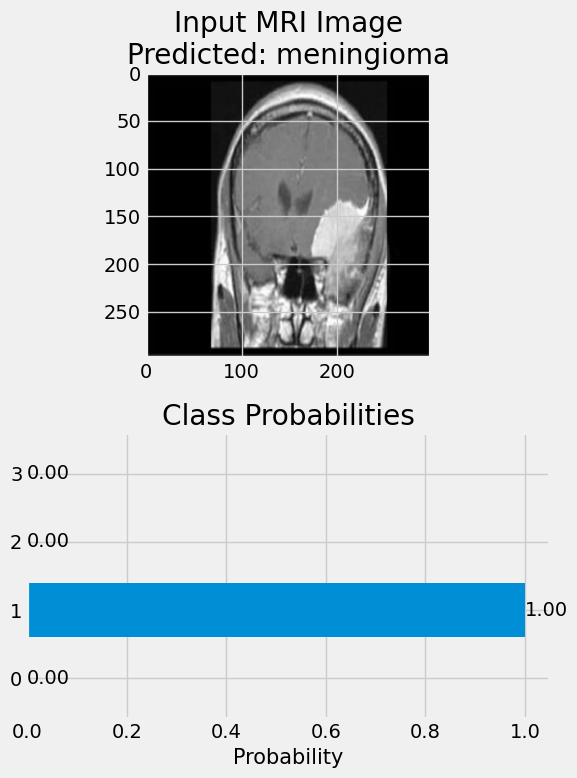


Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


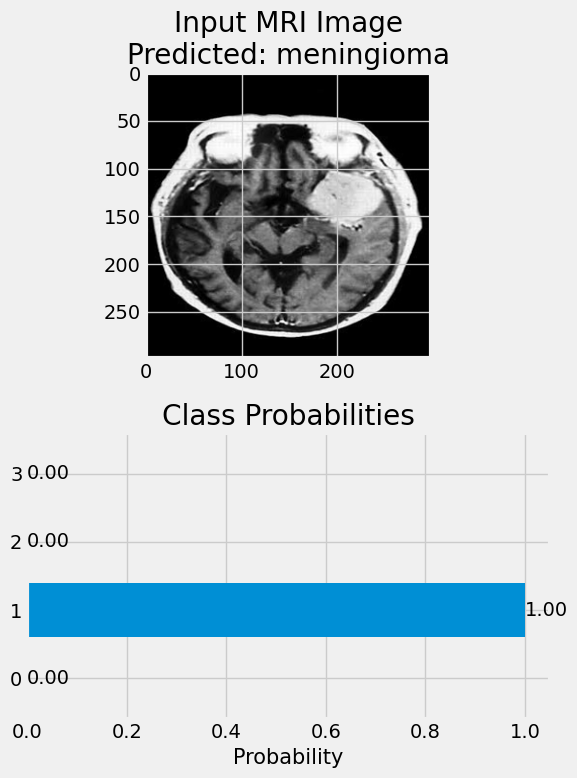


Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


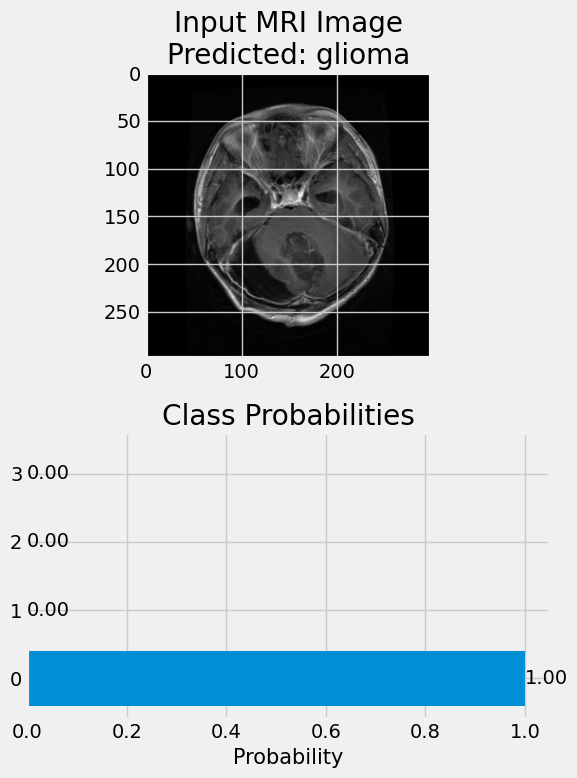


Predicted tumor type: glioma


In [78]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [79]:
model.save_weights("xception_model.weights.h5")

In [80]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [81]:
batch_size = 16

img_size = (224, 224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size = batch_size,
                                             target_size = img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size = batch_size,
                                             target_size = img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size = 16,
                                             target_size = img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [82]:
# Create a Sequential model

cnn_model = Sequential()

# Convolutional layers
cnn_model.add(Conv2D (512, (3, 3), padding='same', input_shape=(224,224,3), activation ='relu'))
cnn_model.add (MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D (256, (3, 3), padding='same', activation='relu'))
cnn_model.add (MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout (0.25))

cnn_model.add(Conv2D (128, (3, 3), padding='same', activation='relu'))
cnn_model.add (MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D (64, (3, 3), padding='same', activation ='relu'))
cnn_model.add (MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout (0.35))

cnn_model.add(Dense (4, activation='softmax')) # Output layer with 4 neurons for the 4 classes

# Compile the model
cnn_model.compile(Adamax(learning_rate = 0.001), loss='categorical_crossentropy', metrics= ['accuracy', Precision(), Recall()])

# Display the model summary
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
history = cnn_model.fit(tr_gen, epochs=5, validation_data=valid_gen)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 110s 291ms/step - accuracy: 0.5687 - loss: 2.3957 - precision_4: 0.6715 - recall_4: 0.3810 - val_accuracy: 0.7298 - val_loss: 1.0879 - val_precision_4: 0.8348 - val_recall_4: 0.5634
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 103s 287ms/step - accuracy: 0.8092 - loss: 0.8151 - precision_4: 0.8331 - recall_4: 0.7768 - val_accuracy: 0.8031 - val_loss: 0.7042 - val_precision_4: 0.8227 - val_recall_4: 0.7863
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 102s 287ms/step - accuracy: 0.8526 - loss: 0.5840 - precision_4: 0.8644 - recall_4: 0.8342 - val_accuracy: 0.8672 - val_loss: 0.5506 - val_precision_4: 0.8841 - val_recall_4: 0.8382
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 102s 287ms/step - accuracy: 0.8726 - loss: 0.4849 - precision_4: 0.8833 - recall_4: 0.8607 - val_accuracy: 0.8550 - val_loss: 0.4982 - val_precision_4: 0.8669 - val_recall_4: 0.8351
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 102s 287ms/step - accuracy: 0.9111 - loss: 0.3966 - precision_4: 0.9178 - rec

In [84]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'precision_4', 'recall_4', 'val_accuracy', 'val_loss', 'val_precision_4', 'val_recall_4'])


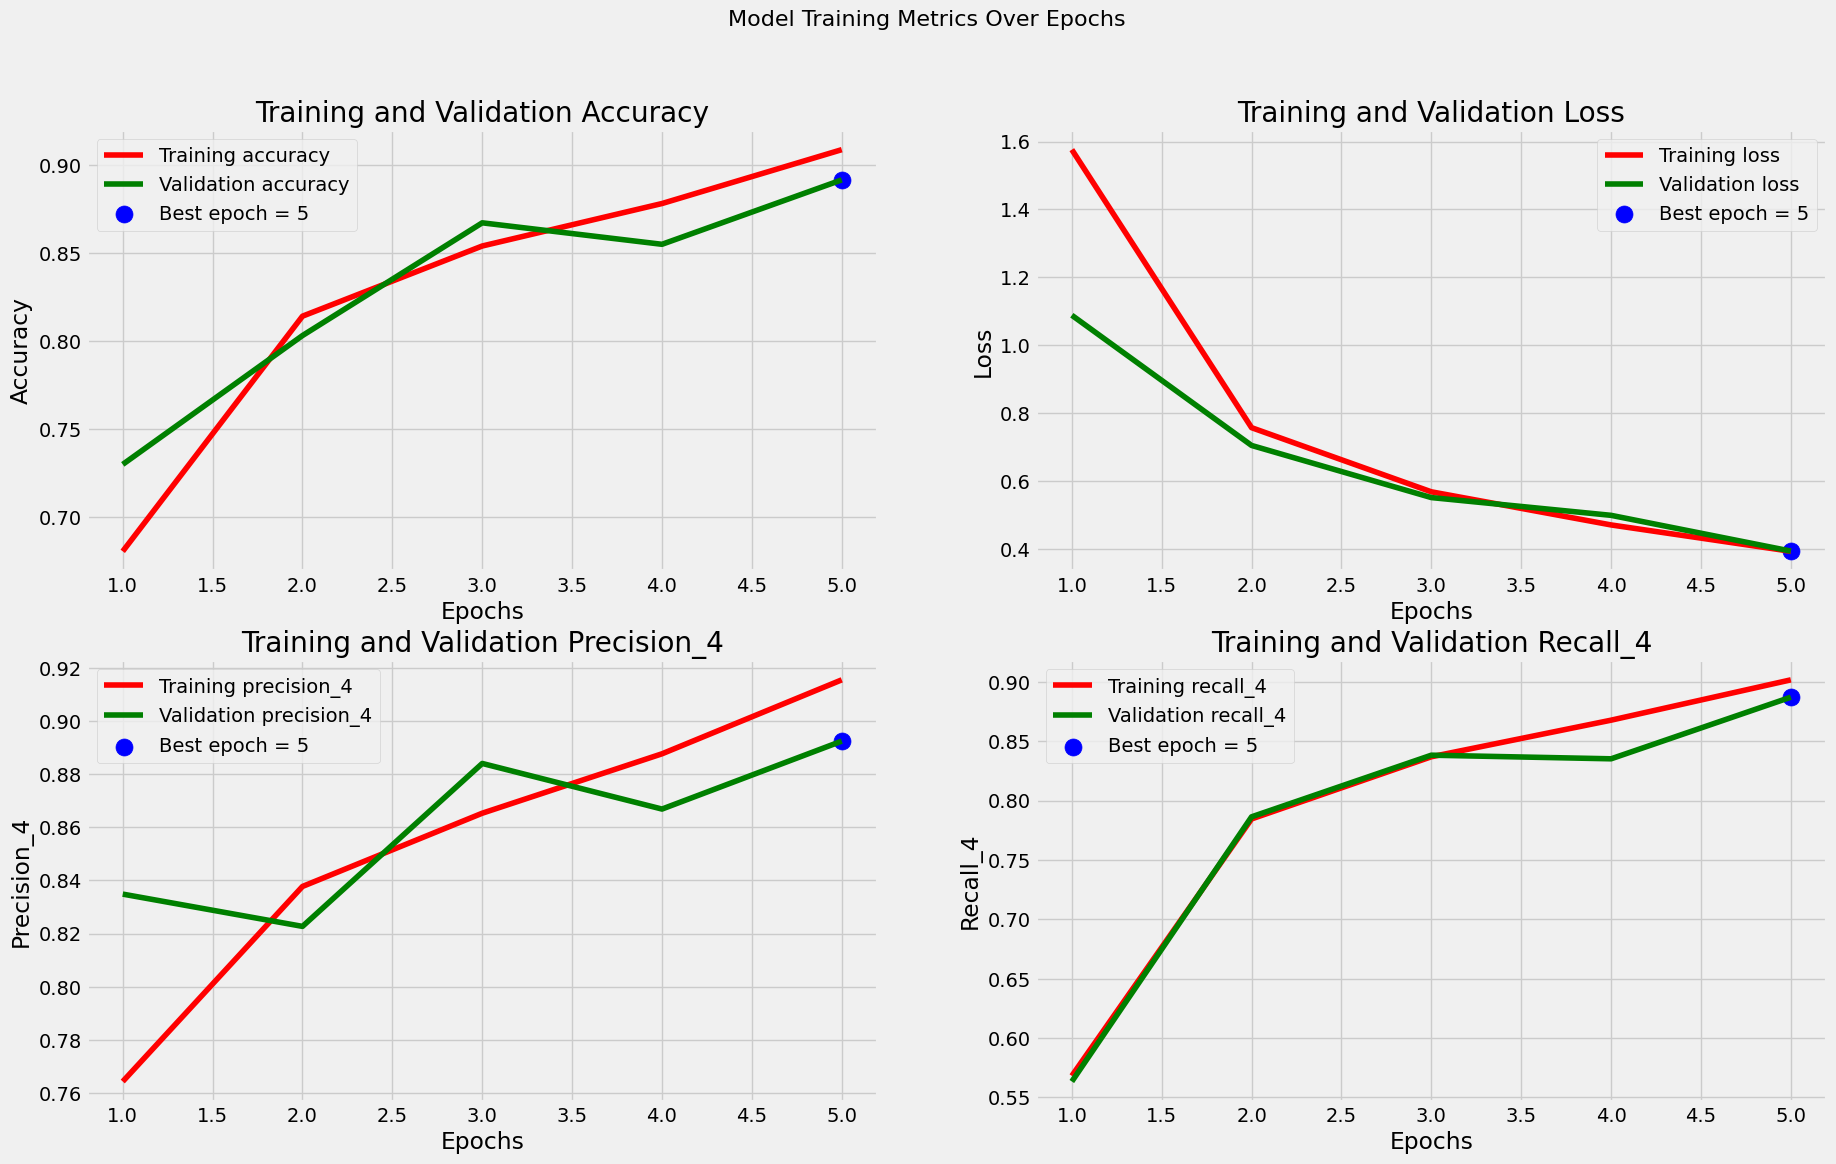

In [86]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision_4', 'recall_4']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)
    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')
    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)
plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


In [87]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {train_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 36s 102ms/step - accuracy: 0.9582 - loss: 0.2732 - precision_4: 0.9597 - recall_4: 0.9553
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.8973 - loss: 0.4036 - precision_4: 0.8969 - recall_4: 0.8937


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.9259 - loss: 0.3412 - precision_4: 0.9273 - recall_4: 0.9250
Train Accuracy: 95.64%
Train Loss: 0.2779


Validation Accuracy: 90.38%
Validation Loss: 0.3857


Test Accuracy: 91.46%
Test Loss: 0.2779


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step


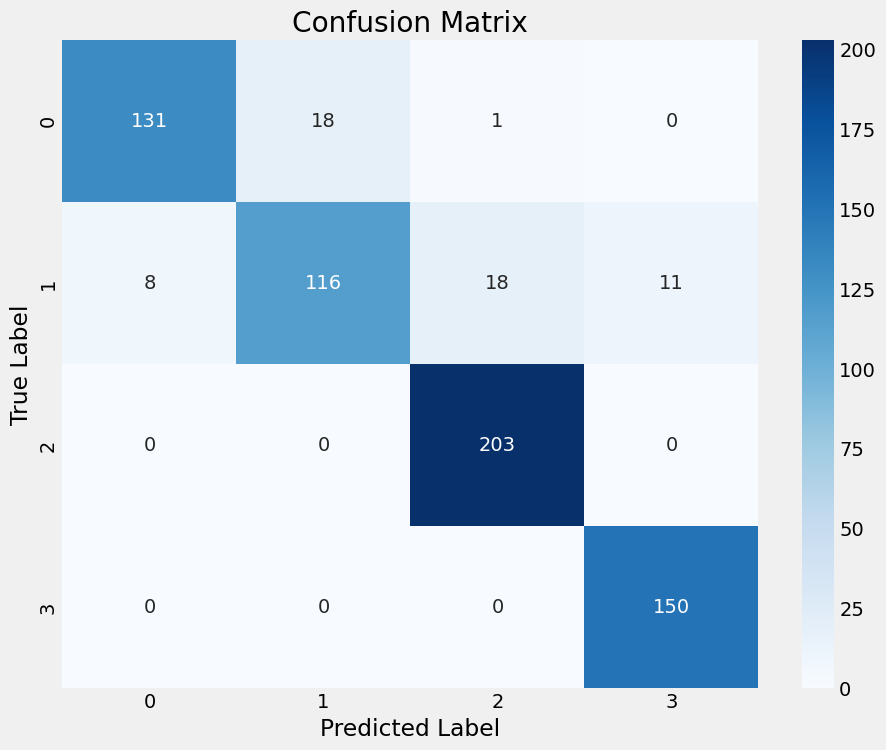

In [88]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [89]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.94      0.87      0.91       150
           1       0.87      0.76      0.81       153
           2       0.91      1.00      0.96       203
           3       0.93      1.00      0.96       150

    accuracy                           0.91       656
   macro avg       0.91      0.91      0.91       656
weighted avg       0.91      0.91      0.91       656



In [90]:
cnn_model.save("cnn_model.h5")

**Part 2: Streamlit Web App**

In [91]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.9 MB/s eta 0:00:00


In [92]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [93]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [111]:
def run_streamlit():
    os.system("streamlit run /content/app.py --server.port 8501")

In [151]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from google.colab import userdata
from dotenv import load_dotenv
load_dotenv()

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

def generate_explanation(img_path, model_prediction, confidence):
    prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
    The saliency map was generated by a deep learning model that was trained to classify brain tumors
    as either glioma, meningioma, pituitary, or no tumor.

    The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.
    The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

    In your response:
    - Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted
    in light cyan, those are the regions where the model is focusing on.
    - Explain possible reasons why the model made the prediction it did.
    - Don't mention anything like 'The saliency map highlights the regions the model is focusing on, which are in light cyan'
    in your explanation.
    - Keep your explanation to 4 sentences max.

    Let's think step by step about this. Verify step by step.
    """

    img = PIL.Image.open(img_path)
    model = genai.GenerativeModel(model_name="gemini-2.0-flash")
    response = model.generate_content([prompt, img])

    return response.text


def generate_saliency_map(model, img_array, class_index, img_size):
    with tf.GradientTape() as tape:
        img_tensor = tf.convert_to_tensor(img_array)
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        target_class = predictions [:, class_index]

    gradients = tape.gradient(target_class, img_tensor)
    gradients = tf.math.abs(gradients)
    gradients = tf.reduce_max(gradients, axis=-1)
    gradients = gradients.numpy().squeeze()

    # Resize gradients to match original image size
    gradients = cv2.resize(gradients, img_size)

    # Create a circular mask for the brain area
    center = (gradients.shape[0] // 2, gradients.shape [1] // 2)
    radius = min(center[0], center [1]) - 10
    y, x = np.ogrid [:gradients.shape[0], :gradients.shape[1]]
    mask = (x - center [0])**2 + (y - center [1])**2 <= radius**2

    # Apply mask to gradients
    gradients = gradients * mask

    # Normalize only the brain area
    brain_gradients = gradients [mask]
    if brain_gradients.max() > brain_gradients.min():
        brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
    gradients [mask] = brain_gradients

    # Apply a higher threshold
    threshold = np.percentile (gradients [mask], 80)
    gradients [gradients < threshold] = 0

    # Apply more aggressive smoothing
    gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

    # Create a heatmap overlay with enhanced contrast
    heatmap = cv2.applyColorMap (np.uint8(255 * gradients), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Resize heatmap to match original image size
    heatmap = cv2.resize(heatmap, img_size)

    # Superimpose te heatmap on original image with increased opacity
    original_img = image.img_to_array(img)
    superimposed_img = heatmap * 0.7 + original_img * 0.3
    superimposed_img = superimposed_img.astype(np.uint8)

    img_path = os.path.join(output_dir, uploaded_file.name)
    with open(img_path, "wb") as f:
        f.write(uploaded_file.getbuffer())

    saliency_map_path = f'saliency_maps/{uploaded_file.name}'

    # Save the saliency map
    cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

    return superimposed_img


def load_xception_model(model_path):
    img_shape=(299,299,3)
    base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet",
                                                    input_shape=img_shape, pooling='max')

    model = Sequential([
        base_model,
        Flatten(),
        Dropout(rate=0.3),
        Dense(128, activation='relu'),
        Dropout(rate=0.25),
        Dense(4, activation='softmax')
    ])

    model.build((None,) + img_shape)

    # Compile the model
    model.compile(Adamax(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy',
                           Precision(),
                           Recall()])

    model.load_weights(model_path)
    return model


st.title("Brain Tumor Classification")

st.write("Upload an image of a brain MRI scan to classify.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:

    selected_model = st.radio(
        label="Select Model",
        options=("Transfer Learning - Xception", "Custom CNN")
    )

    if selected_model =="Transfer Learning - Xception":
        model = load_xception_model('/content/xception_model.weights.h5')
        img_size = (299, 299)

    else:
        model = load_model('/content/cnn_model.h5')
        img_size = (224, 224)

    labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
    img = image.load_img(uploaded_file, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)

    # Get the class with the highest probability
    class_index = np.argmax(prediction[0])
    result = labels[class_index]

    st.write(f"Prediction Class: {result}")
    st.write("Predictions:")
    for label, prob in zip(labels, prediction[0]):
        st.write(f"{label}: {prob:.4f}")

    saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

    col1, col2 = st.columns(2)
    with col1:
        st.image(uploaded_file, caption='Uploaded Image', use_container_width=True)
    with col2:
        st.image(saliency_map, caption='Saliency Map', use_container_width=True)

    saliency_map_path =f'saliency_maps/{uploaded_file.name}'
    explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

    st.write("## Classification Results")
    result_container = st.container()
    result_container = st.container()
    result_container.markdown (
        f"""
        <div style="background-color: #000000; color: #ffffff; padding: 30px; border-radius: 15px;">
            <div style="display: flex; justify-content: space-between; align-items: center;">
                <div style="flex: 1; text-align: center;">
                    <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Prediction</h3>
                    <p style="font-size: 36px; font-weight: 800; color: #FF0000; margin: 0;">
                        {result}
                    </p>
                </div>
                <div style="width: 2px; height: 80px; background-color: #ffffff; margin: 0 20px;"></div>
                <div style="flex: 1; text-align: center;">
                    <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Confidence</h3>
                    <p style="font-size: 36px; font-weight: 800; color: #2196F3; margin: 0;">
                        {prediction[0][class_index]:.4%}
                    </p>
                </div>
            </div>
        </div>
        """,
        unsafe_allow_html=True
    )

    # Prepare data for Plotly chart
    probabilities = prediction [0]
    sorted_indices = np.argsort(probabilities) [::-1]
    sorted_labels = [labels [i] for i in sorted_indices]
    sorted_probabilities = probabilities [sorted_indices]

    # Create a Plotly bar chart
    fig = go.Figure(go.Bar(
        x=sorted_probabilities,
        y=sorted_labels,
        orientation='h',
        marker_color= ['red' if label == result else 'blue' for label in sorted_labels]
    ))

    # Customize the chart layout
    fig.update_layout(
        title='Probabilities for each class',
        xaxis_title='Probability',
        yaxis_title='Class',
        height=400,
        width=600,
        yaxis=dict(autorange="reversed")
    )

    # Add value labels to the bars
    for i, prob in enumerate (sorted_probabilities):
        fig.add_annotation(
            x=prob,
            y=i,
            text=f'{prob:.4f}',
            showarrow=False,
            xanchor='left',
            xshift=5
        )
    # Display the Plotly chart
    st.plotly_chart(fig)

    saliency_map_path = f'saliency_maps/{uploaded_file.name}'
    explanation = generate_explanation (saliency_map_path, result, prediction [0] [class_index])

    st.write("## Explanation")
    st.write(explanation)

Overwriting app.py


In [152]:
thread = Thread(target=run_streamlit)
thread.start()

In [153]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)

print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://ced6-34-125-30-192.ngrok-free.app" -> "http://localhost:8501"


In [149]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
    print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
    ngrok.disconnect(tunnel.public_url)

Closing tunnel: https://5f05-34-125-30-192.ngrok-free.app -> http://localhost:8501
Closing tunnel: https://fc37-34-125-30-192.ngrok-free.app -> http://localhost:8501
Closing tunnel: https://f203-34-125-30-192.ngrok-free.app -> http://localhost:8501


Overwriting .env
